In [8]:
import pandas as pd

covid_df = pd.read_csv('data/covid_df.csv', sep=',')

In [9]:
covid_df['date'] = pd.to_datetime(covid_df['date'])

## <center> БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS

Основным методом для создания простейших графиков в Pandas является **plot()**.

>Основные параметры метода **plot()**:
>>- *x* — название признака, который будет отложен по оси абсцисс;
>>- *y* — название признака, который будет отложен по оси ординат;
>>- *figsize* — размер графика (кортеж из ширины и высоты в дюймах);
>>- *kind* —тип визуализации. Основные типы:
>>>- *'line'* — линейный график (по умолчанию);
>>>- *'bar'* — столбчатая диаграмма;
>>>- *'barh'* — горизонтальная столбчатая диаграмма;
>>>- *'hist'* — гистограмма;
>>>- *'box'* — коробчатая диаграмма (boxplot);
>>>- *'pie'* — круговая диаграмма;
>>>- *'scatter'* — диаграмма рассеяния.
>>- *grid* — отображение сетки (по умолчанию False);
>>- *legend* — отображение легенды (по умолчанию False);
>>- *title* — название графика;
>>- *color* — цвет.

Давайте попрактикуемся в использовании метода **plot()**.

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


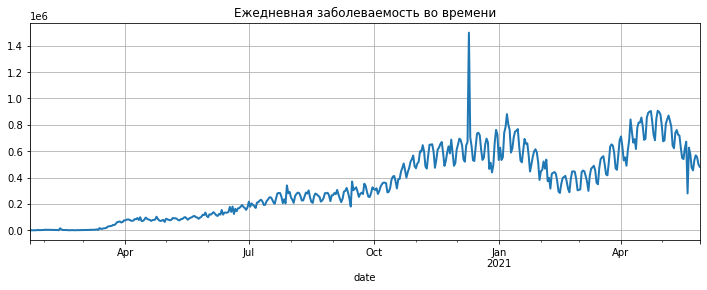

In [13]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12,4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=2
);

**Примечание.** Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная grouped_cases — это объект Series.

plot() может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).

Теперь построим **гистограмму**, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

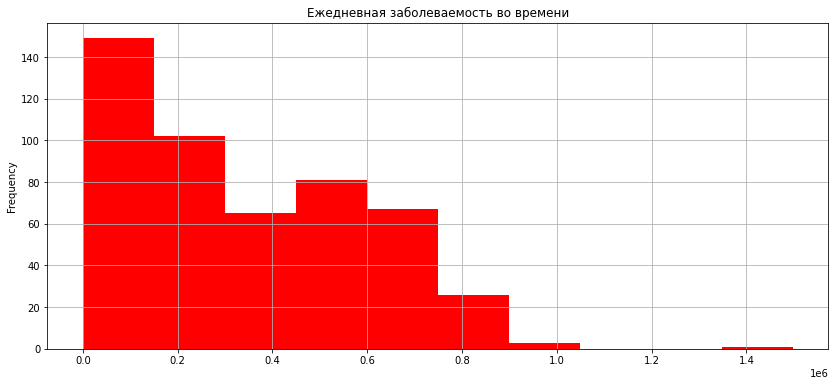

In [18]:
grouped_cases.plot(
    kind='hist',
    figsize=(14,6),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    bins=10,
    color='red'
);

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

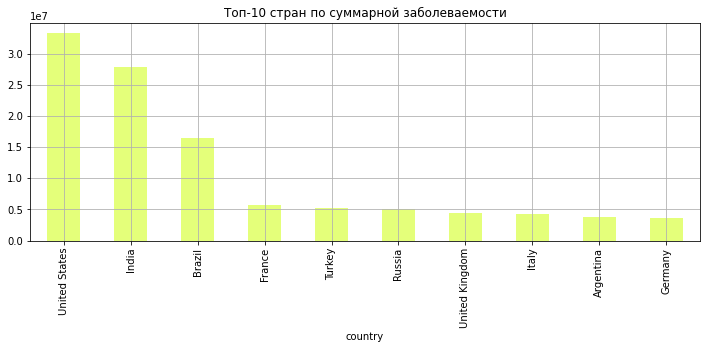

In [22]:
grouped_cases = covid_df.groupby(['country'])['confirmed'].last()
grouped_cases = grouped_cases.nlargest(10)
grouped_cases.plot(
    kind='bar',
    figsize=(12,4),
    title='Топ-10 стран по суммарной заболеваемости',
    grid=True,
    colormap='Wistia'
);

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

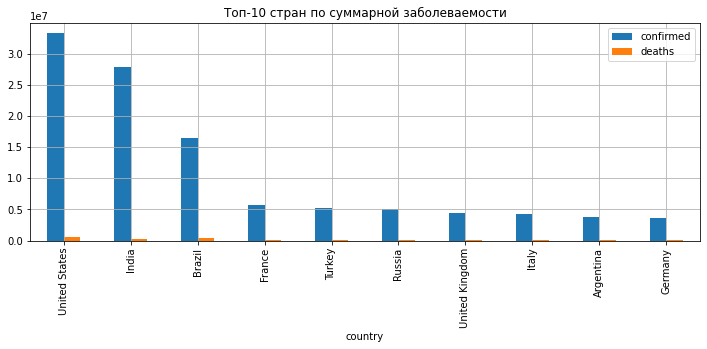

In [23]:
grouped_cases = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_cases = grouped_cases.nlargest(10, columns='confirmed')
grouped_cases.plot(
    kind='bar',
    figsize=(12,4),
    title='Топ-10 стран по суммарной заболеваемости',
    grid=True
);

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!

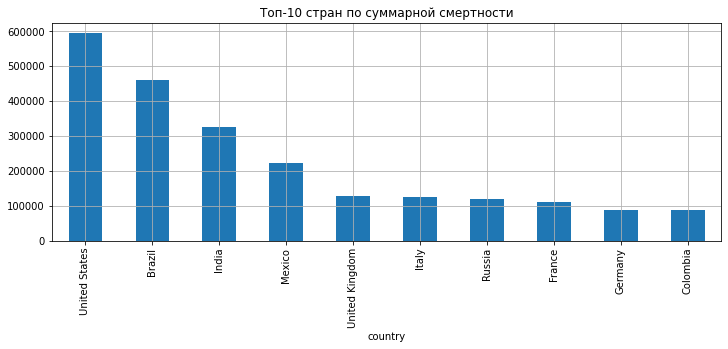

In [26]:
grouped_cases = covid_df.groupby('country')['deaths'].last()
grouped_cases = grouped_cases.nlargest(10)
grouped_cases.plot(
    kind='bar',
    figsize=(12,4),
    title='Топ-10 стран по суммарной смертности',
    grid=True
);

Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить «здесь и сейчас», не сильно заботясь об их внешнем виде. Однако такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации — довольно ограниченный функционал:

С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации Pandas не подходит.
Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах.
Сложно (иногда и вовсе невозможно) корректировать внешний вид графика.
Отсутствует 3D-визуализация.

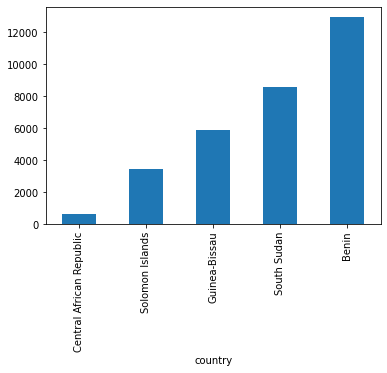

In [28]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');